In [1]:
import anndata
import numpy as np
import sys
import torch
sys.path.append('../../../../')
import velovae as vv
%load_ext autoreload
%autoreload 2

In [2]:
dataset = "Hindbrain_pons"
root = "/scratch/blaauw_root/blaauw1/gyichen"
#adata = anndata.read_h5ad(f'/nfs/turbo/umms-welchjd/yichen/data/scRNA/utv_datasets/oligo_lite.h5ad')
adata = anndata.read_h5ad(f'{root}/data/{dataset}_pp.h5ad')
adata.obs['clusters']=adata.obs['celltype'].to_numpy()

In [ ]:
# Uncomment this if data is not preprocessed
#vv.preprocess(adata, n_gene=2000, min_shared_counts=20)
#adata.write_h5ad(f'data/{dataset}_pp.h5ad')

In [3]:
model_path_base = f'{root}/checkpoints/{dataset}'
figure_path_base = f'{root}/figures/{dataset}'
data_path = f'{root}/data/velovae/continuous/{dataset}'
gene_plot = ['Gpt2','Klf9','Frmd4a','Kcnj12','Opalin']

# VeloVAE

In [4]:
figure_path = f'{figure_path_base}/VeloVAE'
model_path = f'{model_path_base}/VeloVAE'

torch.manual_seed(2022)
np.random.seed(2022)
vae = vv.VAE(adata, 
             tmax=20, 
             dim_z=5, 
             device='cuda:0',
             init_method='steady',
             reverse_gene_mode=True)

vae.train(adata, plot=False, gene_plot=gene_plot, figure_path=figure_path)

vae.save_model(model_path, 'encoder', 'decoder')
vae.save_anndata(adata, 'velovae', data_path, file_name=f'{dataset}.h5ad')

Estimating ODE parameters...


  0%|          | 0/2000 [00:00<?, ?it/s]

Detected 581 velocity genes.
Estimating the variance...


  0%|          | 0/2000 [00:00<?, ?it/s]

Initialization using the steady-state and dynamical models.
Reinitialize the regular ODE parameters based on estimated global latent time.


  0%|          | 0/2000 [00:00<?, ?it/s]

3 clusters detected based on gene co-expression.
(0.57, 0.7402950396479713), (0.43, 0.4025060351941064)
KS-test result: [0. 1. 1.]
Initial induction: 598, repression: 1402/2000
Learning Rate based on Data Sparsity: 0.0003
--------------------------- Train a VeloVAE ---------------------------
*********        Creating Training/Validation Datasets        *********
*********                      Finished.                      *********
*********                 Creating optimizers                 *********
*********                      Finished.                      *********
*********                    Start training                   *********
*********                      Stage  1                       *********
Total Number of Iterations Per Epoch: 35, test iteration: 68
*********       Stage 1: Early Stop Triggered at epoch 467.       *********
*********                      Stage  2                       *********
*********             Velocity Refinement Round 1             ***

  0%|          | 0/6253 [00:00<?, ?it/s]

Percentage of Invalid Sets: 0.016
Average Set Size: 127
*********     Round 1: Early Stop Triggered at epoch 625.    *********
Change in noise variance: 0.3419
*********             Velocity Refinement Round 2             *********
*********     Round 2: Early Stop Triggered at epoch 697.    *********
Change in noise variance: 0.0027
Change in x0: 0.1901
*********             Velocity Refinement Round 3             *********
*********     Round 3: Early Stop Triggered at epoch 839.    *********
Change in noise variance: 0.0004
Change in x0: 0.1143
*********             Velocity Refinement Round 4             *********
*********     Round 4: Early Stop Triggered at epoch 927.    *********
Change in noise variance: 0.0000
Change in x0: 0.0914
*********             Velocity Refinement Round 5             *********
*********     Round 5: Early Stop Triggered at epoch 947.    *********
Change in noise variance: 0.0000
Change in x0: 0.0733
*********             Velocity Refinement Round 6   

# Full VB

In [5]:
figure_path = f'{figure_path_base}/FullVB'
model_path = f'{model_path_base}/FullVB'

torch.manual_seed(2022)
np.random.seed(2022)
full_vb = vv.VAE(adata, 
                 tmax=20, 
                 dim_z=5, 
                 device='cuda:0',
                 full_vb=True,
                 init_method='steady',
                 reverse_gene_mode=True)

full_vb.train(adata, plot=False, gene_plot=gene_plot, figure_path=figure_path)

full_vb.save_model(model_path, 'encoder', 'decoder')
full_vb.save_anndata(adata, 'fullvb', data_path, file_name=f'{dataset}.h5ad')

Estimating ODE parameters...


  0%|          | 0/2000 [00:00<?, ?it/s]

Detected 581 velocity genes.
Estimating the variance...


  0%|          | 0/2000 [00:00<?, ?it/s]

Initialization using the steady-state and dynamical models.
Reinitialize the regular ODE parameters based on estimated global latent time.


  0%|          | 0/2000 [00:00<?, ?it/s]

3 clusters detected based on gene co-expression.
(0.57, 0.7402950396479713), (0.43, 0.4025060351941064)
KS-test result: [0. 1. 1.]
Initial induction: 598, repression: 1402/2000
Learning Rate based on Data Sparsity: 0.0003
--------------------------- Train a VeloVAE ---------------------------
*********        Creating Training/Validation Datasets        *********
*********                      Finished.                      *********
*********                 Creating optimizers                 *********
*********                      Finished.                      *********
*********                    Start training                   *********
*********                      Stage  1                       *********
Total Number of Iterations Per Epoch: 35, test iteration: 68
*********       Stage 1: Early Stop Triggered at epoch 428.       *********
*********                      Stage  2                       *********
*********             Velocity Refinement Round 1             ***

  0%|          | 0/6253 [00:00<?, ?it/s]

Percentage of Invalid Sets: 0.020
Average Set Size: 127
*********     Round 1: Early Stop Triggered at epoch 543.    *********
Change in noise variance: 0.3042
*********             Velocity Refinement Round 2             *********
*********     Round 2: Early Stop Triggered at epoch 580.    *********
Change in noise variance: 0.0017
Change in x0: 0.2559
*********             Velocity Refinement Round 3             *********
*********     Round 3: Early Stop Triggered at epoch 617.    *********
Change in noise variance: 0.0006
Change in x0: 0.1952
*********             Velocity Refinement Round 4             *********
*********     Round 4: Early Stop Triggered at epoch 664.    *********
Change in noise variance: 0.0000
Change in x0: 0.1804
*********             Velocity Refinement Round 5             *********
*********     Round 5: Early Stop Triggered at epoch 705.    *********
Change in noise variance: 0.0000
Change in x0: 0.1598
*********             Velocity Refinement Round 6   

# Plotting

In [2]:
root = '/scratch/blaauw_root/blaauw1/gyichen'
dataset = 'Hindbrain_pons'
adata = anndata.read_h5ad(f'{root}/data/velovae/continuous/{dataset}/{dataset}.h5ad')

In [3]:
Ek = np.median(adata.layers['fullvb_velocity_u']**2 + adata.layers['fullvb_velocity']**2, 0)
gidx = np.argsort(Ek)[-4:]

---   Plotting  Results   ---


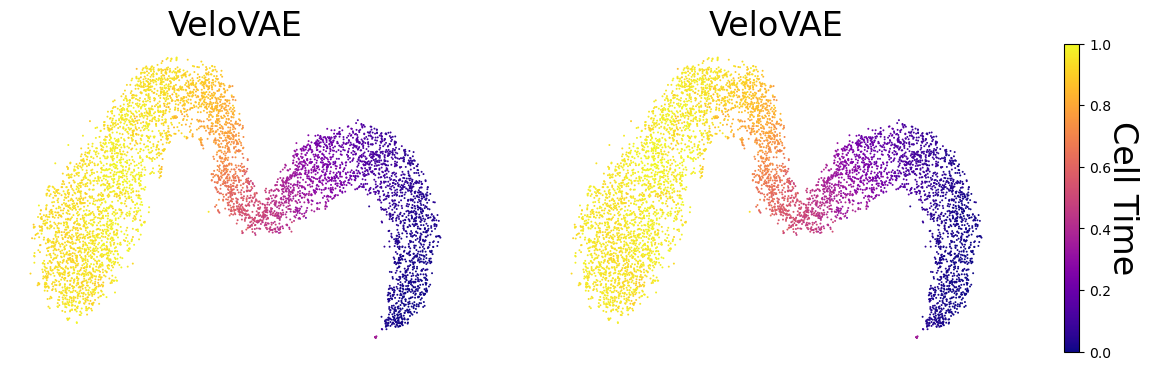

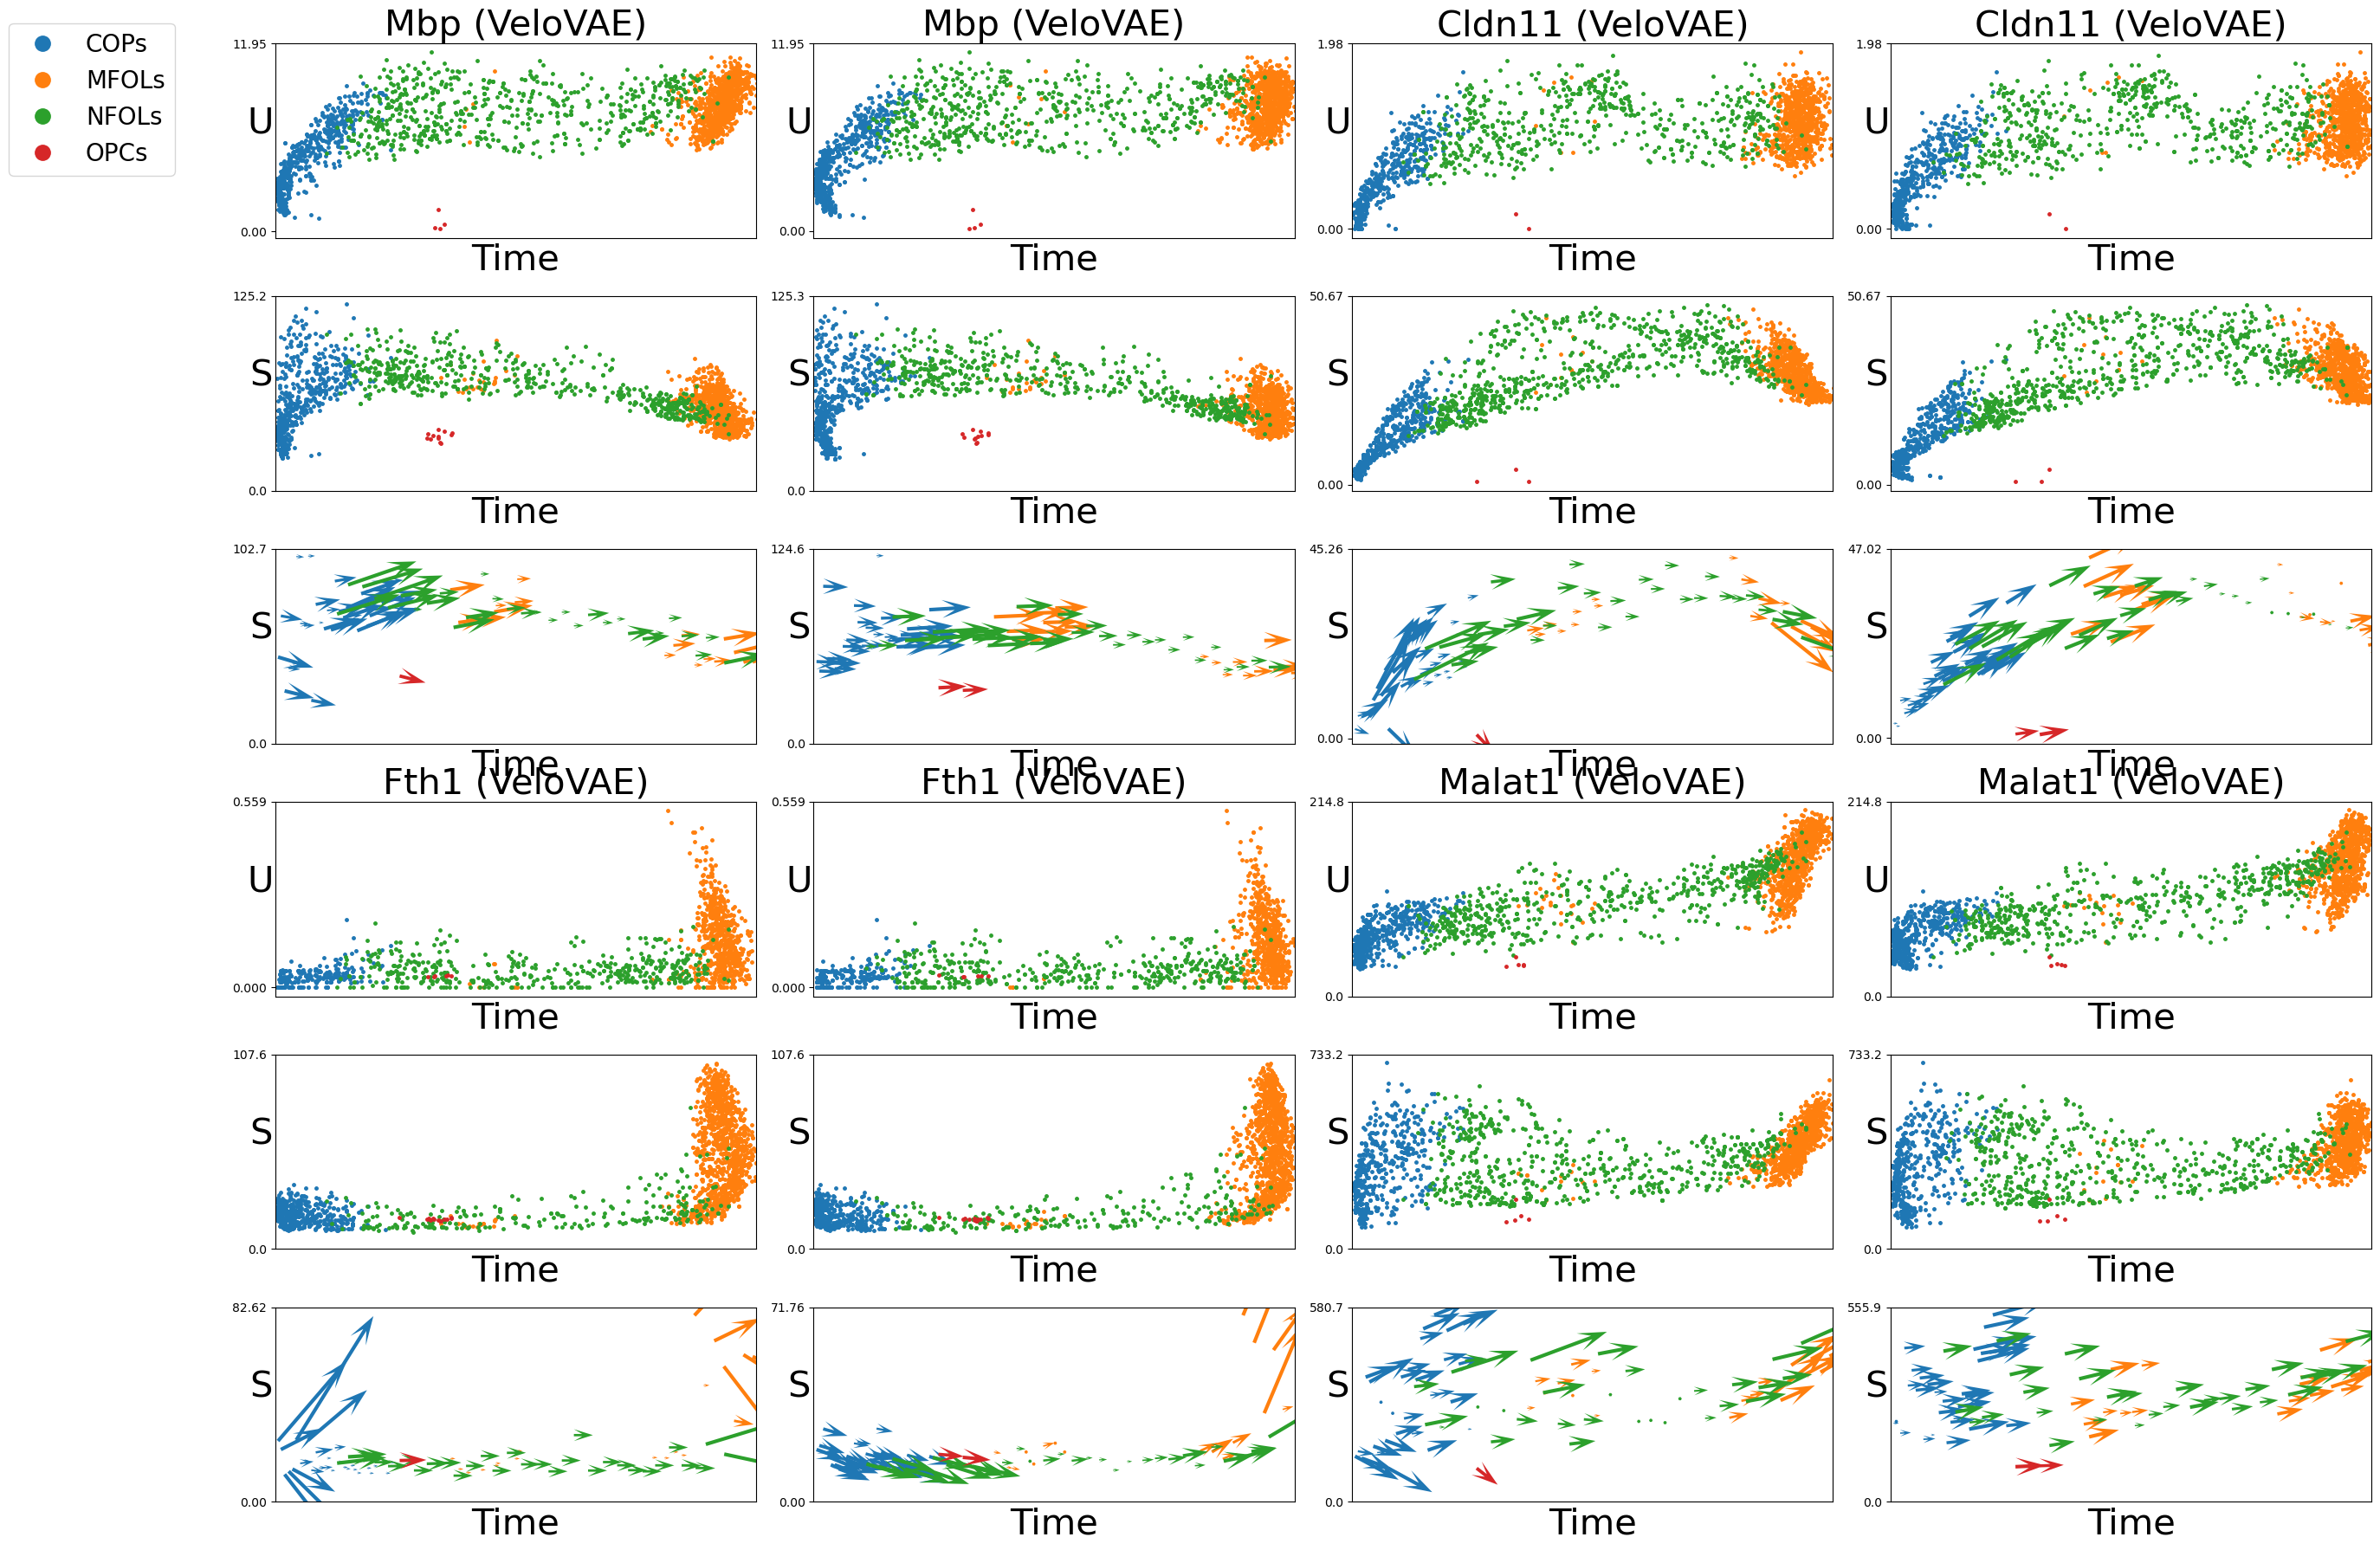

In [4]:
gidx = np.argsort(Ek)[-4:]
gene_plot = adata.var_names[gidx]
res, res_type = vv.post_analysis(adata,
                                 dataset,
                                 ['VeloVAE', 'FullVB'],
                                 ['velovae', 'fullvb'],
                                 compute_metrics=False,
                                 genes=gene_plot,
                                 plot_type=['time', 'gene'],
                                 grid_size=(2,2),
                                 figure_path=f'{root}/figures/{dataset}')

computing velocity graph (using 4/36 cores)


  0%|          | 0/6253 [00:00<?, ?cells/s]

    finished (0:00:46) --> added 
    'fullvb_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:01) --> added
    'fullvb_velocity_umap', embedded velocity vectors (adata.obsm)


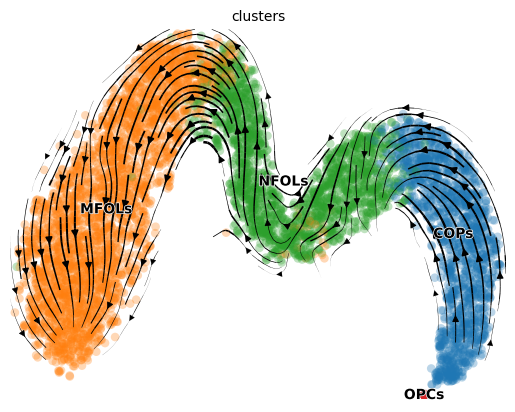

In [5]:
import scvelo as scv
scv.tl.velocity_graph(adata, vkey='fullvb_velocity', n_jobs=4)
scv.pl.velocity_embedding_stream(adata, vkey='fullvb_velocity')